In [1]:
corpous={
    "I was having a meal.",
    "I was sitting on a chair.",
    "I will be getting ready."
}

In [2]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
model=TfidfVectorizer()
model.fit_transform(corpous)
print(model.vocabulary_)

{'will': 9, 'be': 0, 'getting': 2, 'ready': 6, 'was': 8, 'sitting': 7, 'on': 5, 'chair': 1, 'having': 3, 'meal': 4}


In [3]:
all_feature_names=model.get_feature_names_out()

In [4]:
all_feature_names

array(['be', 'chair', 'getting', 'having', 'meal', 'on', 'ready',
       'sitting', 'was', 'will'], dtype=object)

In [5]:
for word in all_feature_names:
    indx = model.vocabulary_.get(word)
    idf_score = model.idf_[indx]
    print(f"{word} : {idf_score}")

be : 1.6931471805599454
chair : 1.6931471805599454
getting : 1.6931471805599454
having : 1.6931471805599454
meal : 1.6931471805599454
on : 1.6931471805599454
ready : 1.6931471805599454
sitting : 1.6931471805599454
was : 1.2876820724517808
will : 1.6931471805599454


In [6]:
# importing libraries

import numpy as np
import pandas as pd
df=pd.read_csv("/kaggle/input/ecommerce/Ecommerce_data.csv")
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [7]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [8]:
df.shape

(24000, 2)

# so much data . takes time to train model . so reduce in small size

In [9]:
df=df.head(5000)

In [10]:
import warnings
warnings.filterwarnings('ignore')
df['label_num']=df['label'].map({'Household':0,'Electronics':1,'Clothing & Accessories':2,'Books':3})
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [11]:
x=df['Text']
y=df['label_num']

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2022,stratify=df['label_num'])


In [13]:
X_train.shape

(4000,)

In [14]:
X_test.shape

(1000,)

In [15]:
y_train.shape

(4000,)

In [16]:
y_test.shape

(1000,)

Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

use TF-IDF for pre-processing the text.

use KNN as the classifier

print the classification report.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

clf=Pipeline(
    [('vectorizer_tfidf',TfidfVectorizer()),
    ('KNN',KNeighborsClassifier())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.95      0.94      0.95       257
           2       0.98      0.95      0.96       237
           3       0.93      0.95      0.94       251

    accuracy                           0.94      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.94      0.95      1000



In [18]:
X_test[10:20]

610     Frabjous Pebbles Glossy Home Decorative Vase F...
2002                         Jack & Jones Men's Waistcoat
3945                     Fundamentals of Database System 
52      Artis AR-MAC-60W-MG1 100-240V Laptop Adapter f...
3143    Toreto 15.6 Inch Finished Leather Premium Qual...
4887    Satyam Kraft Rectangle Shape Metal Printed Tru...
4171    VIMAL JONNEY Winter Cover Blended Thermal Bott...
3937    evo India Magazine Issues brief evo India Febr...
2392    Glow: Indian Foods, Recipes and Rituals for Be...
3849    Make: JavaScript Robotics - Building NodeBots ...
Name: Text, dtype: object

In [19]:
y_test[10:20]

610     0
2002    2
3945    3
52      1
3143    1
4887    0
4171    2
3937    3
2392    3
3849    3
Name: label_num, dtype: int64

In [20]:
y_pred[10:20]

array([0, 2, 3, 1, 1, 0, 2, 3, 3, 3])

Attempt 2 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

use TF-IDF for pre-processing the text.

use MultinomialNB as the classifier.

print the classification report.

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf=Pipeline([('vectorizer_tdidf',TfidfVectorizer()),
             ('NB',MultinomialNB())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.96      0.96      0.96       257
           2       0.99      0.97      0.98       237
           3       0.97      0.92      0.95       251

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Attempt 3 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.
Note:

use TF-IDF for pre-processing the text.

use Random Forest as the classifier.

print the classification report.

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf=Pipeline([('tfidf_vectorizer',TfidfVectorizer()),
             ('RF',RandomForestClassifier())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.97      0.92      0.95       257
           2       0.97      0.95      0.96       237
           3       0.90      0.96      0.93       251

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [23]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [24]:
import spacy
nlp=spacy.load("en_core_web_sm")
def filtered(text):
    doc=nlp(text)
    filtered_text=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [25]:
df['preprocessed_text']=df['Text'].apply(filtered)
df.head()

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


In [26]:
df['Text'][2]

'IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012'

In [27]:
df['preprocessed_text'][2]

'IO Crest SY PCI40010 PCI raid Host Controller Card Brings new life old desktop pc connect 4 SATA II high speed SATA hard disk drive support Windows 8 Server 2012'

In [28]:
x=df['preprocessed_text']
y=df['label_num']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=2022,test_size=0.2,stratify=df['label_num'])

In [30]:
X_train.shape

(4000,)

In [31]:
X_test.shape

(1000,)

In [32]:
y_train.shape

(4000,)

In [33]:
y_test.shape

(1000,)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
clf=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('RF',RandomForestClassifier())
])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       255
           1       0.98      0.93      0.96       257
           2       0.97      0.98      0.97       237
           3       0.91      0.96      0.94       251

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[232   4   6  13]
 [ 11 240   0   6]
 [  1   0 232   4]
 [  6   1   2 242]]


Text(95.72222222222221, 0.5, 'truth')

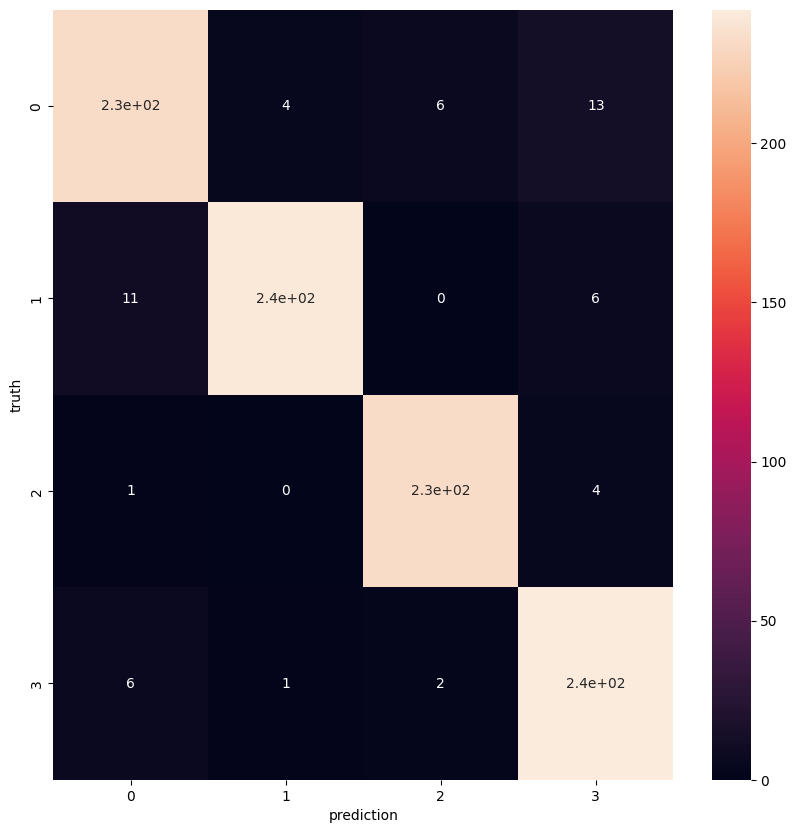

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("truth")
